In [54]:
#.libPaths(c("/home/data/refdir/Rlib","/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1"))
library(scibet)
library(Seurat)
library(scater)
library(scran)
library(dplyr)
library(tibble)
library(Matrix)
library(cowplot)
library(ggplot2)
library(harmony)
rm(list = ls())
gc()
setwd('/home/data/t060324/jobs/aimin/')

used     (Mb)  gc trigger (Mb)    max used   (Mb)   
Ncells  8369098 447.0   14812880   791.1   14812880   791.1
Vcells 14704158 112.2 2342007312 17868.1 3811774177 29081.6

In [83]:
mergeData_B <- readRDS(file = './output/1.sangleCell_pre/OV_mergeData_B.RDS')

In [57]:
mergeData_T <- readRDS(file = './output/1.sangleCell_pre/OV_mergeData_T.RDS')

In [58]:
mergeData_TAM <- readRDS(file = './output/1.sangleCell_pre/OV_mergeData_TAM.RDS')

## 1.T cell visualization

In [25]:
mergeData_T <- subset(mergeData_T,cellType !='unknow')

In [59]:
table(mergeData_T$cellType)


        Th17           Tn         Treg          Tfh       CD8+Te      CD8+Tem 
        4976         8921         6080         1270         8038         4177 
CD8+Tex-like       CD8+Tn   GZMK+ CD8T     ISG+CD8T           NK    Mature NK 
        2463         1724         3128         4401         5776         3042 
     CD38+NK 
        1010 

In [38]:
mergeData_T$cellType <- factor(mergeData_T$cellType,
                                    levels = c('Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK'),
                                    labels = c('Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK'))

In [39]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 33)

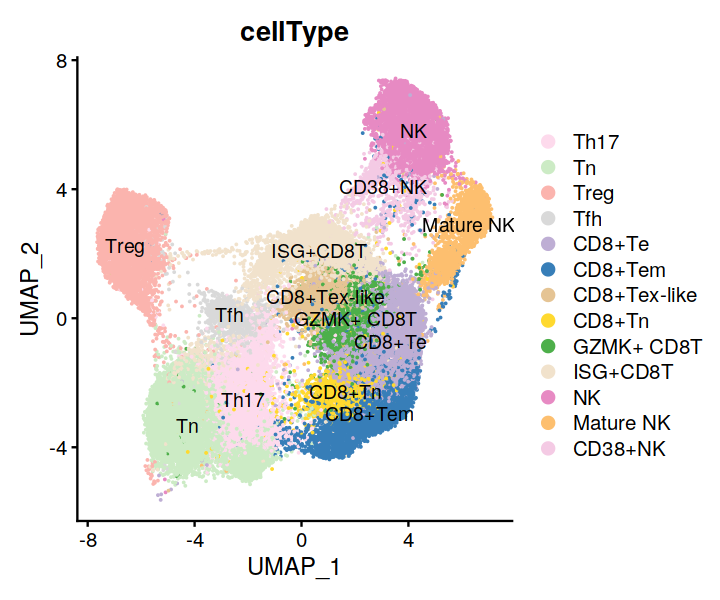

In [40]:
options(repr.plot.height = 5, repr.plot.width = 6)
dimP <- DimPlot(object = mergeData_T,reduction = 'umap',group.by = c('cellType'),cols = cellType_col[18:30], label = T)
dimP

In [41]:
pdf(file = './output/bulk/section_3/0.Tcell_DimPlot.pdf',width = 6,height = 5)
print(dimP)
dev.off()

png 
  2

In [42]:
saveRDS(mergeData_T,file = './output/1.sangleCell_pre/OV_mergeData_T.RDS')

In [32]:
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
suppressMessages(library(scibet))
suppressMessages(library(viridis))
suppressMessages(library(ggsci))


In [88]:
cellType <- as.character(mergeData_T$cellType)
names(cellType) <- colnames(mergeData_T)
cell_list <- split(colnames(mergeData_T),f = cellType)
sampleCell <- lapply(cell_list,function(x){
    if(length(x)<400){
        subsample <- x
    }else{
        subsample <- sample(x = x,size = 400,replace = F)
    }
 return(subsample)
})
sampleCell <- do.call(c,sampleCell)
mergeData_T_sub <- subset(mergeData_T,cells = sampleCell)

In [89]:
mergeData_T_sub <- subset(mergeData_T,cells = sampleCell)

In [90]:
expr <- t(as.matrix(mergeData_T_sub@assays$RNA@data))
expr <- as.data.frame(expr)
expr$label <- mergeData_T_sub$cellType


In [91]:
etest_gene <- SelectGene(expr = expr,k = 100)

In [92]:
etest_gene <- etest_gene[!grepl(pattern = '^RP[LS]',etest_gene)]
etest_gene <- etest_gene[!grepl(pattern = '^MT-',etest_gene)]

In [190]:
length(etest_gene)

[1] 2908

In [191]:
saveRDS(etest_gene,file = './output/1.sangleCell_pre/OV_mergeData_TcellMaker_Top3000.RDS')

In [94]:
Idents(mergeData_T) <- 'cellType'

In [7]:
Idents(mergeData_T) <- 'cellType'
TcellMarkers <- FindAllMarkers(mergeData_T,only.pos = T,logfc.threshold = 0.5,min.pct = 0.2)

Calculating cluster Th17

Calculating cluster Tn

Calculating cluster Treg

Calculating cluster Tfh

Calculating cluster CD8+Te

Calculating cluster CD8+Tem

Calculating cluster CD8+Tn

Calculating cluster CD8+TpreEx

Calculating cluster ISG+CD8T

Calculating cluster NK

Calculating cluster Mature NK

Calculating cluster CD38+NK



In [8]:
head(TcellMarkers)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene   
IL7R     0.000000e+00 1.1882837  0.675 0.325  0.000000e+00 Th17    IL7R   
CD40LG   0.000000e+00 0.9708659  0.251 0.055  0.000000e+00 Th17    CD40LG 
ANXA1   9.151163e-302 0.8340384  0.800 0.614 4.356411e-297 Th17    ANXA1  
S100A11 1.148813e-223 0.6364675  0.806 0.681 5.468922e-219 Th17    S100A11
GPR183  4.086068e-215 0.8244749  0.435 0.248 1.945173e-210 Th17    GPR183 
KLF6    2.626298e-191 0.6974044  0.849 0.752 1.250249e-186 Th17    KLF6

In [13]:
subset(TcellMarkers,cluster=='CD8+Te')

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene    
GZMH      0.000000e+00 1.3222662  0.716 0.286  0.000000e+00 CD8+Te  GZMH    
CD8A      0.000000e+00 1.2131879  0.734 0.284  0.000000e+00 CD8+Te  CD8A    
CD8B      0.000000e+00 1.0719795  0.599 0.224  0.000000e+00 CD8+Te  CD8B    
ZNF683    0.000000e+00 0.9328318  0.401 0.144  0.000000e+00 CD8+Te  ZNF683  
ITM2C     0.000000e+00 0.8990705  0.525 0.246  0.000000e+00 CD8+Te  ITM2C   
CCL5      0.000000e+00 0.8406769  0.968 0.693  0.000000e+00 CD8+Te  CCL5    
GZMA      0.000000e+00 0.7996946  0.772 0.504  0.000000e+00 CD8+Te  GZMA    
COTL1     0.000000e+00 0.7982290  0.755 0.538  0.000000e+00 CD8+Te  COTL1   
HLA-DRB1  0.000000e+00 0.7465059  0.687 0.471  0.000000e+00 CD8+Te  HLA-DRB1
GZMK      0.000000e+00 0.7405345  0.641 0.350  0.000000e+00 CD8+Te  GZMK    
ALOX5AP   0.000000e+00 0.7007212  0.667 0.473  0.000000e+00 CD8+Te  ALOX5AP 
HLA-DPA1  0.000000e+00 0.6895118  0.659 0.459  0.000000e+00 CD8+Te  HLA-DPA1
HLA-DPB1  0.000000e+00 0.6854737  0.721 0.500  0.000000e+00 CD8+Te  HLA-DPB1
HLA-DQA1  0.000000e+00 0.6806482  0.408 0.220  0.000000e+00 CD8+Te  HLA-DQA1
APOBEC3G  0.000000e+00 0.6111071  0.659 0.472  0.000000e+00 CD8+Te  APOBEC3G
SH3BGRL3  0.000000e+00 0.6013218  0.904 0.831  0.000000e+00 CD8+Te  SH3BGRL3
CD52      0.000000e+00 0.5586153  0.846 0.736  0.000000e+00 CD8+Te  CD52    
S100A6    0.000000e+00 0.5505282  0.892 0.826  0.000000e+00 CD8+Te  S100A6  
CST7      0.000000e+00 0.5075478  0.776 0.570  0.000000e+00 CD8+Te  CST7    
HLA-DRA  2.336390e-287 0.6336017  0.616 0.433 1.112239e-282 CD8+Te  HLA-DRA 
HLA-DQB1 1.348262e-281 0.6451863  0.498 0.313 6.418403e-277 CD8+Te  HLA-DQB1
HLA-DRB5 7.565345e-269 0.5723820  0.326 0.164 3.601483e-264 CD8+Te  HLA-DRB5
LGALS1   1.889462e-268 0.5992844  0.717 0.561 8.994786e-264 CD8+Te  LGALS1  
GYG1     1.101474e-256 0.5750808  0.327 0.173 5.243566e-252 CD8+Te  GYG1    
PTMS     4.856625e-245 0.5967399  0.419 0.249 2.311996e-240 CD8+Te  PTMS    
TRBC1    1.737241e-237 0.6741623  0.643 0.523 8.270138e-233 CD8+Te  TRBC1   
TRGC2    8.797826e-236 0.5399796  0.323 0.168 4.188205e-231 CD8+Te  TRGC2   
YBX3     4.466435e-233 0.5601742  0.257 0.121 2.126246e-228 CD8+Te  YBX3    
GZMM     3.903179e-211 0.5144904  0.531 0.371 1.858109e-206 CD8+Te  GZMM    
APOBEC3H 1.277336e-210 0.5009481  0.239 0.116 6.080760e-206 CD8+Te  APOBEC3H
GRAP2    9.431897e-203 0.5195751  0.297 0.164 4.490055e-198 CD8+Te  GRAP2   
C12orf75 9.770369e-202 0.5396070  0.424 0.273 4.651184e-197 CD8+Te  C12orf75
TUBA4A   8.352072e-181 0.5176394  0.591 0.444 3.976004e-176 CD8+Te  TUBA4A  
GLUL     3.904084e-171 0.5626620  0.288 0.163 1.858539e-166 CD8+Te  GLUL    
MT1E      2.013692e-65 0.6993463  0.263 0.187  9.586179e-61 CD8+Te  MT1E    
MT1X      1.073095e-36 0.5563936  0.306 0.249  5.108468e-32 CD8+Te  MT1X

In [96]:
top10 <- TcellMarkers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

Warning message:
“All elements of `...` must be named.
Did you want `data = -label`?”
Warning message:
“Use of `sub_expr$gene` is discouraged. Use `gene` instead.”
Warning message:
“Use of `sub_expr$cell_type` is discouraged. Use `cell_type` instead.”


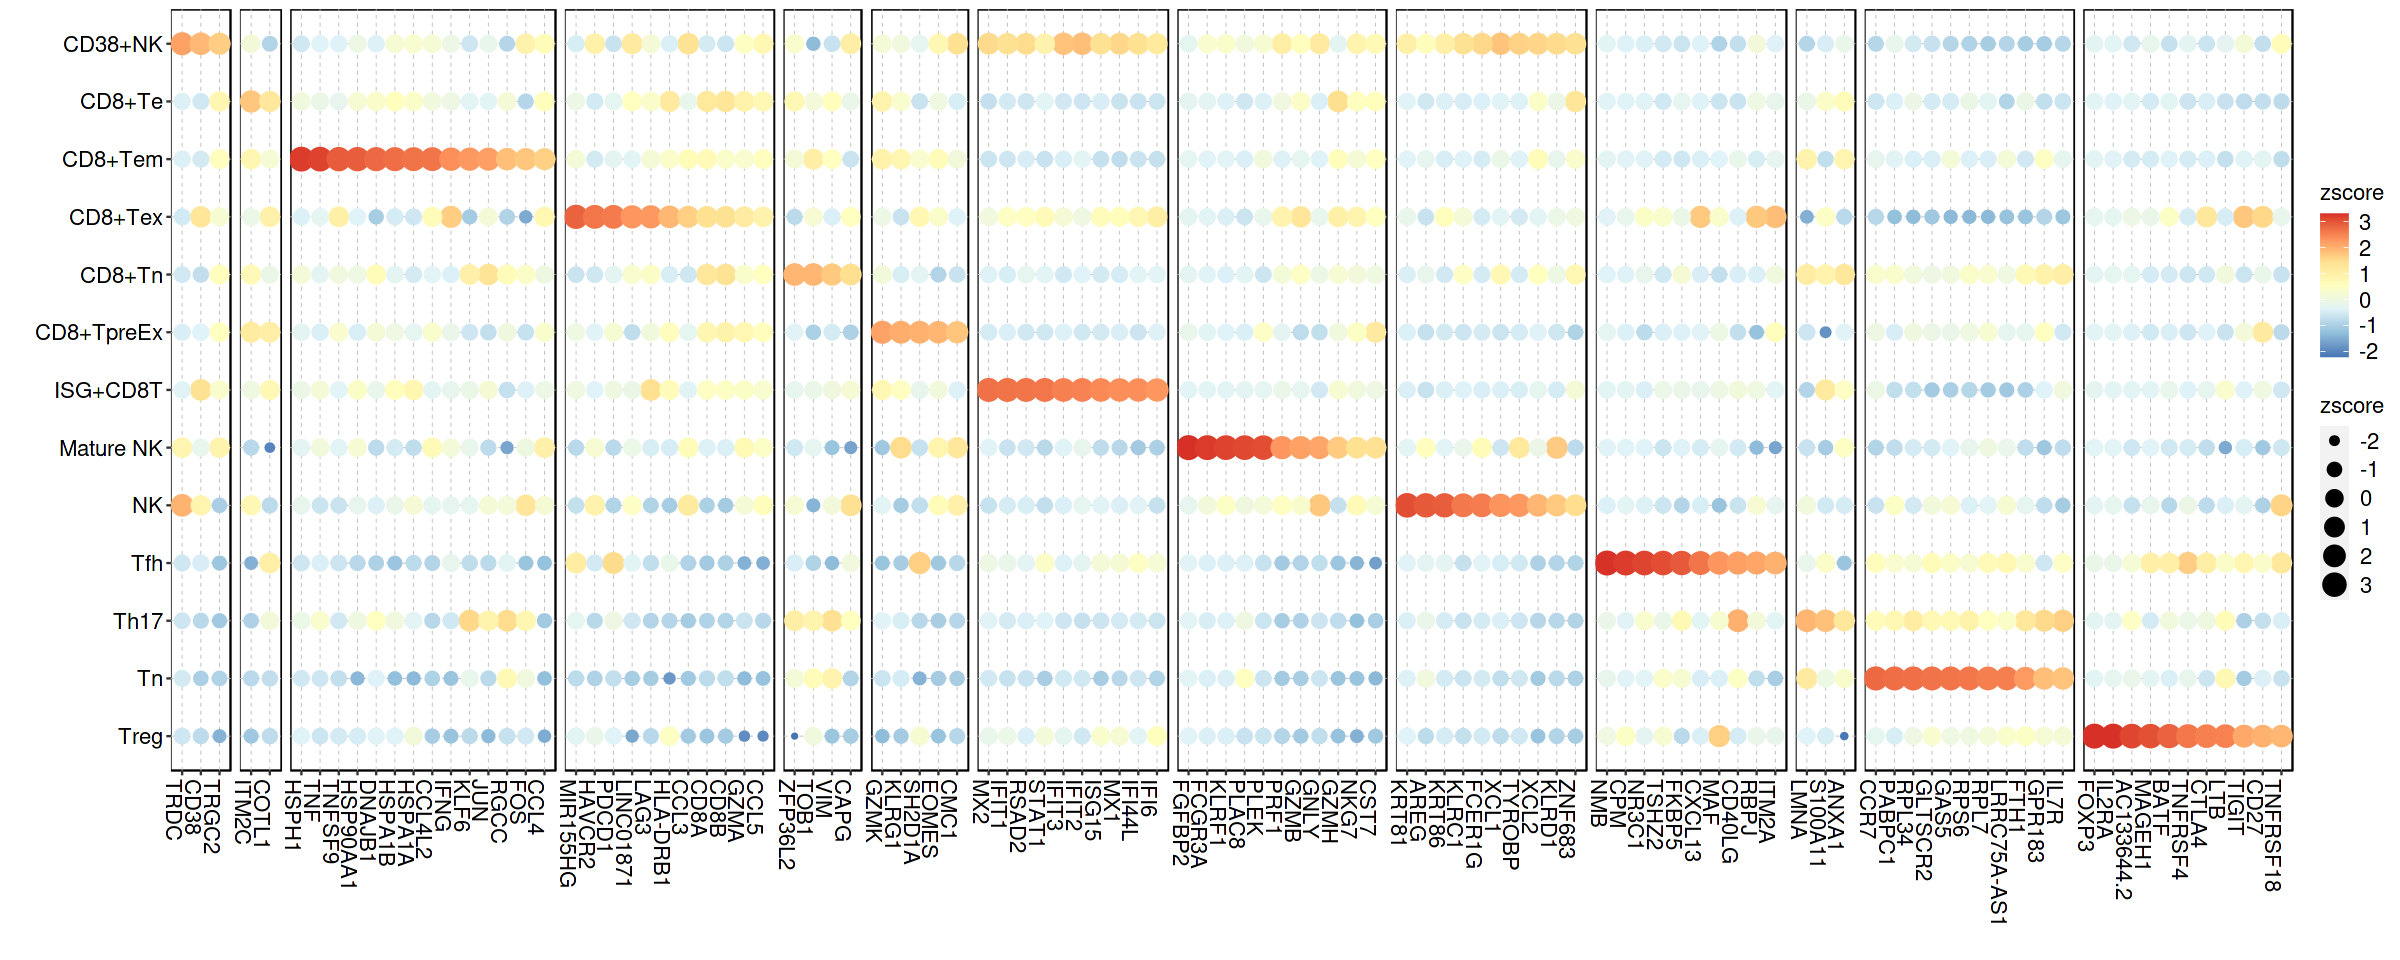

In [97]:
options(repr.plot.height = 8, repr.plot.width = 20)
M_heatmap <- Marker_heatmap(expr, unique(c('CD38',top10$gene)))
M_heatmap

In [98]:
pdf(file = './output/bulk/section_3/0.Tcell_Marker_heatmap.pdf',width = 20,height = 5)
print(M_heatmap)
dev.off()

Warning message:
“Use of `sub_expr$gene` is discouraged. Use `gene` instead.”
Warning message:
“Use of `sub_expr$cell_type` is discouraged. Use `cell_type` instead.”


png 
  2

In [62]:
stemness <- c('SELL','LEF1','CD28','CD27','CCR7','IL7R','CXCR5')
activation <- c('IL2','CD38','ENTPD1','ICOS','TNFRSF9','XCL1')
effector <- c('GZMK','GZMH','GZMB','PRF1','GNLY','IFNG','FGFBP2')
differentiation <- c('ITGA1','ITGAE','ITGA2','ITGAL','ITGB2')
exhaustion <- c('PDCD1','TIGIT','LAG3','CTLA4','CD74','CXCL13','LAYN','MYO7A')
MHC_I <- c('HLA-A','HLA-B','HLA-C','HLA-E','HLA-F','HLA-G','HLA-H','HLA-J','HLA-K','HLA-L','HLA-N')
MHC_II <- c('HLA-DMA','HLA-DMB','HLA-DOA','HLA-DOB','HLA-DPA1','HLA-DPB1',
            'HLA-DPB2','HLA-DQA1','HLA-DQA2','HLA-DQB1','HLA-DQB2','HLA-DRA','HLA-DRB1')
Tmarker <- c('CD3E','CD3D','CD4','CD8A','CD8B')

In [63]:
DotPlot_data_T <- DotPlot(object = mergeData_T,
        features = c(Tmarker,stemness,activation,effector,differentiation,exhaustion),cols = c('blue','red'),group.by = 'cellType')

In [67]:
Tmarker_data  <- DotPlot_data_T$data
Tmarker_data$id <- as.character(Tmarker_data$id)
Tmarker_data$Zscore <- Tmarker_data$avg.exp.scaled
Tmarker_data$cluster <- factor(x = Tmarker_data$id,
                               levels = c('Tn','Th17','Treg','Tfh','CD8+Tn','CD8+Te','CD8+Tem','ISG+CD8T','GZMK+ CD8T','CD8+Tex-like','NK','CD38+NK','Mature NK'),
                                labels = c('Tn','Th17','Treg','Tfh','CD8+Tn','CD8+Te','CD8+Tem','ISG+CD8T','GZMK+ CD8T','CD8+Tex-like','NK','CD38+NK','Mature NK') 
                              )

In [68]:
Tmarker_data$geneClass <- NA
Tmarker_data$geneClass <- ifelse(Tmarker_data$features.plot %in% stemness,'stemness',Tmarker_data$geneClass)
Tmarker_data$geneClass <- ifelse(Tmarker_data$features.plot %in% activation,'activation',Tmarker_data$geneClass)
Tmarker_data$geneClass <- ifelse(Tmarker_data$features.plot %in% effector,'effector',Tmarker_data$geneClass)
Tmarker_data$geneClass <- ifelse(Tmarker_data$features.plot %in% differentiation,'differentiation',Tmarker_data$geneClass)
Tmarker_data$geneClass <- ifelse(Tmarker_data$features.plot %in% exhaustion,'exhaustion',Tmarker_data$geneClass)
Tmarker_data$geneClass <- ifelse(Tmarker_data$features.plot %in% Tmarker,'T cell marker',Tmarker_data$geneClass)

In [69]:
group <- c('Tn','Th17','Treg','Tfh','CD8+Tn','CD8+Te','CD8+Tem','ISG+CD8T','GZMK+ CD8T','CD8+Tex-like','NK','CD38+NK','Mature NK') %>% as.data.frame() %>% 
  mutate(group=c(rep("CD4+ T",4),rep("CD8+ T",6),rep("NK",3))) %>%
  mutate(p="group") %>%
  ggplot(aes(.,y=p,fill=group))+
  geom_tile() + 
  scale_y_discrete(position="right") +
  theme_minimal()+xlab(NULL) + ylab(NULL) +
  theme(axis.text.x = element_blank())+
  labs(fill = "Group")

In [70]:
library(aplot)

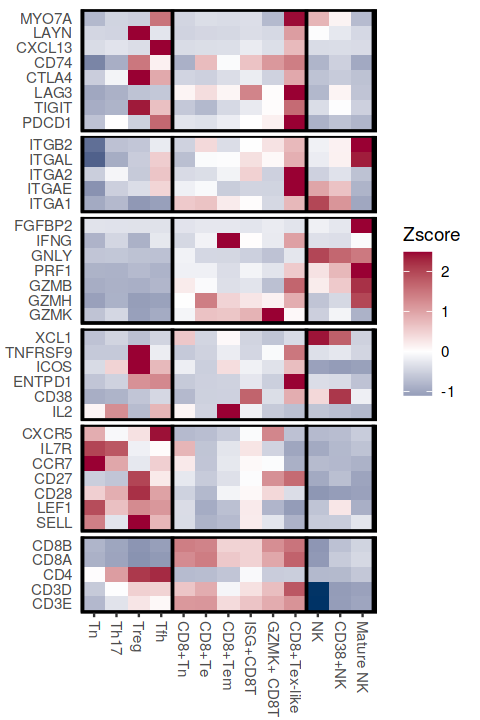

In [71]:
options(repr.plot.height = 6, repr.plot.width = 4)
p1 <- ggplot(subset(Tmarker_data,geneClass=='exhaustion'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
geom_vline(xintercept=c(0.5,4.5,10.5,13.5),size=.8)

p2 <- ggplot(subset(Tmarker_data,geneClass=='differentiation'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
geom_vline(xintercept=c(0.5,4.5,10.5,13.5),size=.8)

p3 <- ggplot(subset(Tmarker_data,geneClass=='effector'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),axis.ticks = element_blank(),axis.text.x = element_blank())+
geom_vline(xintercept=c(0.5,4.5,10.5,13.5),size=.8)

p4 <- ggplot(subset(Tmarker_data,geneClass=='activation'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
geom_vline(xintercept=c(0.5,4.5,10.5,13.5),size=.8)

p5 <- ggplot(subset(Tmarker_data,geneClass=='stemness'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
geom_vline(xintercept=c(0.5,4.5,10.5,13.5),size=.8)

p6 <- ggplot(subset(Tmarker_data,geneClass=='T cell marker'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),legend.position="none",axis.ticks.y = element_blank())+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
geom_vline(xintercept=c(0.5,4.5,10.5,13.5),size=.8)


 p7 <- p1 %>% 
 #insert_top(group, height = .1) %>%
    insert_bottom(p2,height = length(differentiation)/length(exhaustion)) %>%
   insert_bottom(p3,height = length(effector)/length(exhaustion))%>% 
insert_bottom(p4,height = length(activation)/length(exhaustion))%>% 
 insert_bottom(p5,height = length(stemness)/length(exhaustion)) %>%
 insert_bottom(p6,height = length(Tmarker)/length(exhaustion)) 
p7

In [72]:
pdf(file = './output/bulk/section_3/0.Tcell_selectGeneHeatmap.pdf',width = 4,height = 6)
print(p7)
dev.off()

png 
  2

## 2.Visualization of myeloid cells

In [7]:
table(mergeData_TAM$cellType)


        cDC1         cDC2   Macro_C1QB Macro_CCL3L3 Macro_CXCL10  Macro_MARCO 
         595         1379         7421         3390         1770         1386 
  Macro_MT1H   Macro_SPP1    Mono_FCN1    mast_cell 
        1293         2962         2120         1914 

In [8]:
mergeData_TAM$cellType <- as.character(mergeData_TAM$cellType)

In [9]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 33)

In [10]:
mergeData_TAM$cellType <- factor(mergeData_TAM$cellType,
                                    levels = c('cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell'),
                                    labels = c('cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell'))

In [8]:
cellType_col[8:17]

[1] "#E6AB02" "#FC8D62" "#B3B3B3" "#FDB462" "#FFFFB3" "#FB9A99" "#CBD5E8"
 [8] "#33A02C" "#FB8072" "#FDC086"

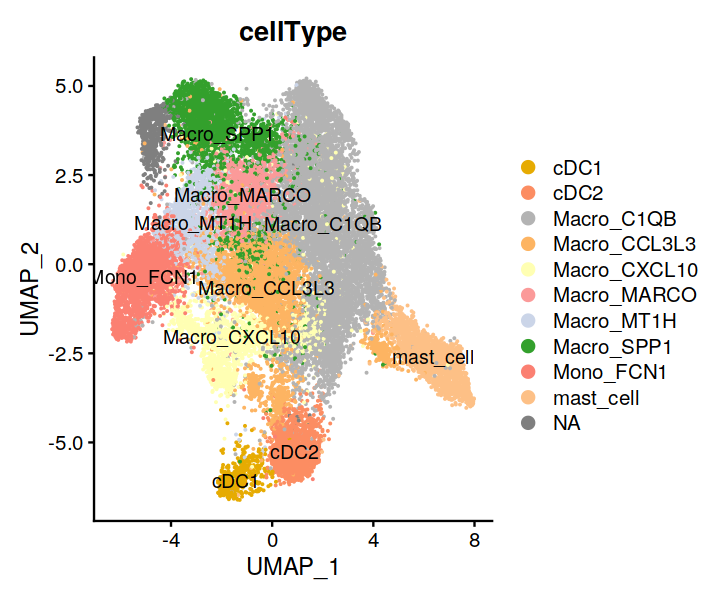

In [9]:
options(repr.plot.height = 5, repr.plot.width = 6)
dimP2 <- DimPlot(object = mergeData_TAM,reduction = 'umap',group.by = c('cellType'),cols = cellType_col[8:17], label = T)
dimP2

In [141]:
pdf(file = './output/bulk/section_3/0.TAMcell_DimPlot.pdf',width = 6,height = 5)
print(dimP2)
dev.off()

png 
  2

In [11]:
cellType <- as.character(mergeData_TAM$cellType)
names(cellType) <- colnames(mergeData_TAM)
cell_list <- split(colnames(mergeData_TAM),f = cellType)
sampleCell <- lapply(cell_list,function(x){
    if(length(x)<400){
        subsample <- x
    }else{
        subsample <- sample(x = x,size = 400,replace = F)
    }
 return(subsample)
})
sampleCell <- do.call(c,sampleCell)
mergeData_TAM_sub <- subset(mergeData_TAM,cells = sampleCell)

In [12]:
expr <- t(as.matrix(mergeData_TAM_sub@assays$RNA@data))
expr <- as.data.frame(expr)
expr$label <- mergeData_TAM_sub$cellType


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


In [13]:
etest_gene <- SelectGene(expr = expr,k = 200)

In [15]:
gene = c(etest_gene,'CXCL9')

 expr <- expr[, c(gene, "label")]
    type_expr <- expr %>% tidyr::nest(-label) %>% dplyr::rename(expr = data) %>% 
        dplyr::mutate(colmeans = purrr::map(.x = expr, .f = function(.x) {
            colMeans(.x)
        }))

    type_mean_expr <- type_expr$colmeans %>% as.data.frame() %>% 
        tibble::remove_rownames() %>% t() %>% as.data.frame() %>% 
        tibble::remove_rownames()
    rownames(type_mean_expr) <- type_expr$label
    colnames(type_mean_expr) <- colnames(expr)[-ncol(expr)]
    sub_expr <- type_mean_expr

    sub_expr <- sub_expr %>% tibble::as.tibble() %>% dplyr::mutate_all(funs((. - 
        mean(.))/sd(.))) %>% t()
    colnames(sub_expr) <- type_expr$label


    get_label <- function(num) {
        v <- sub_expr[num, ]
        colnames(sub_expr)[which(v == max(v))]
    }
    sub_expr <- sub_expr %>% tibble::as.tibble() %>% dplyr::mutate(group = purrr::map_chr(1:length(gene), 
        get_label))
    sub_expr <- as.data.frame(sub_expr)
    rownames(sub_expr) <- gene
    sub_expr <- sub_expr %>% dplyr::mutate(gene = gene) %>% tidyr::gather(key = "cell_type", 
        value = "zscore", -group, -gene) %>% dplyr::arrange(group, 
        desc(zscore))


Warning message:
“Supplying `...` without names was deprecated in tidyr 1.0.0.
ℹ Please specify a name for each selection.
ℹ Did you want `data = -label`?”
Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [18]:
sub_expr_TOP10 = sub_expr %>% group_by(group) %>% top_n(n=9,wt=zscore)

In [19]:
length(unique(sub_expr_TOP10$gene))

[1] 81

In [22]:
library(tibble)

Warning message:
“Use of `sub_expr$gene` is discouraged.
ℹ Use `gene` instead.”
Warning message:
“Use of `sub_expr$cell_type` is discouraged.
ℹ Use `cell_type` instead.”


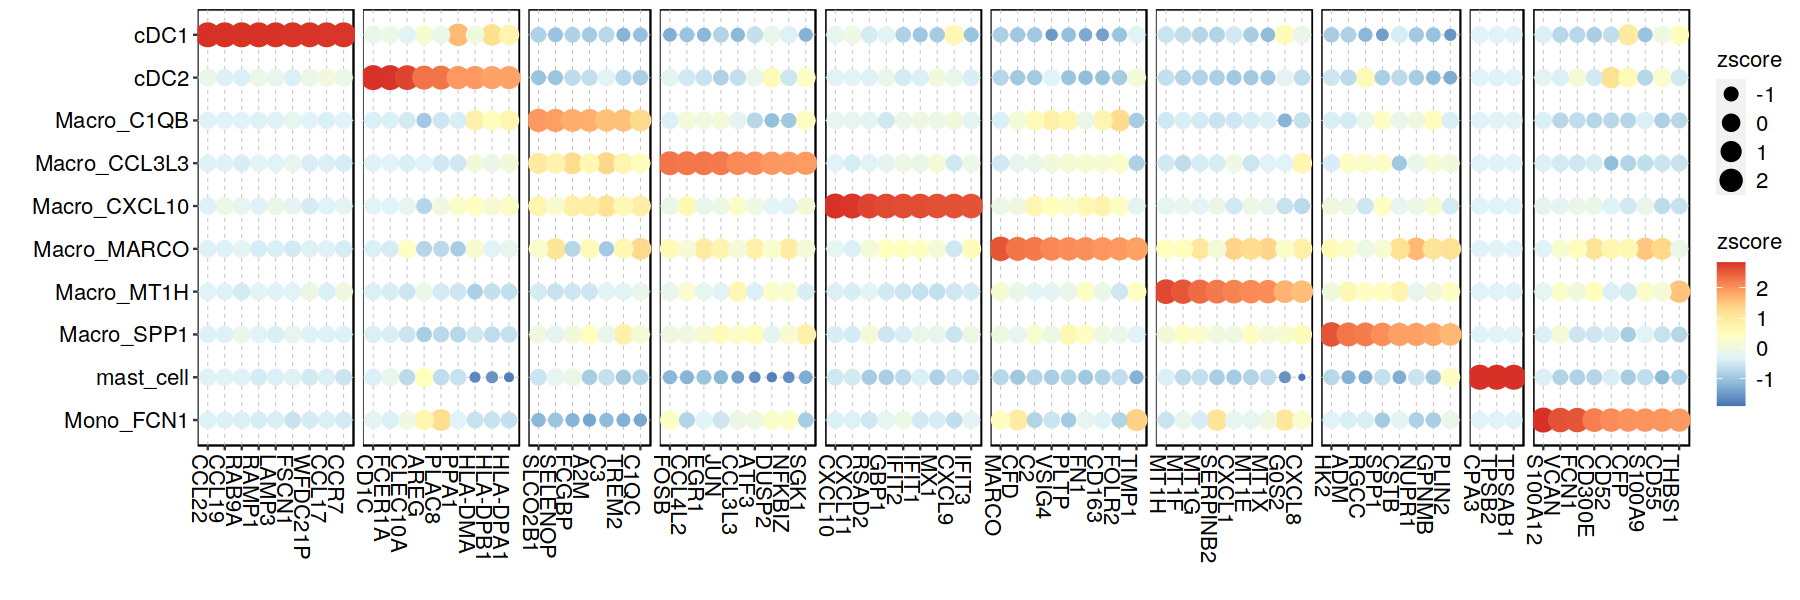

In [23]:
options(repr.plot.height = 5, repr.plot.width = 15)
M_heatmap2 <- Marker_heatmap(expr, unique(sub_expr_TOP10$gene))
M_heatmap2

In [24]:
pdf(file = './output/bulk/section_3/0.TAMcell_Marker_heatmap.pdf',width = 15,height = 5)
print(M_heatmap2)
dev.off()

Warning message:
“Use of `sub_expr$gene` is discouraged.
ℹ Use `gene` instead.”
Warning message:
“Use of `sub_expr$cell_type` is discouraged.
ℹ Use `cell_type` instead.”


png 
  2

In [73]:
M1_gene <- c('CCL5', 'CCR7', 'CD40', 'CD86', 'CXCL9', 'CXCL10', 'CXCL11','IFNG','IL12', 'IDO1', 'IL1A','IL1B', 'IL6', 'IRF1', 'IRF5' , 'KYNU')
M2_gene <- c('CCL4', 'CCL13', 'CCL18', 'CCL20', 'CCL22', 'CD276','CD163', 'CLEC7A', 'CTSA', 'CTSB', 'CTSC', 'CTSD','FN1', 'IL4R', 'IRF4', 'LYVE1', 'MMP9', 'MMP14', 'MMP19', 'MSR1', 'TGFB1', 'TGFB2', 'TGFB3', 'TNFSF8', 'TNFSF12', 'VEGFA', 'VEGFB' , 'VEGFC')

In [74]:
DotPlot_data_TAM <- DotPlot(object = mergeData_TAM,
        features = c(M1_gene,M2_gene,MHC_II),cols = c('blue','red'),group.by = 'cellType')


Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: IL12”


In [75]:
Mmarker_data  <- DotPlot_data_TAM$data
Mmarker_data$Zscore <- Mmarker_data$avg.exp.scaled
Mmarker_data$cluster <- factor(x = Mmarker_data$id,
                               levels = c('cDC1','cDC2','Mono_FCN1','Macro_CCL3L3','Macro_CXCL10','Macro_C1QB','Macro_MT1H','Macro_MARCO','Macro_SPP1'),
                                labels = c('cDC1','cDC2','Mono_FCN1','Macro_CCL3L3','Macro_CXCL10','Macro_C1QB','Macro_MT1H','Macro_MARCO','Macro_SPP1') 
                              )

In [76]:
Mmarker_data$geneClass <- NA
Mmarker_data$geneClass <- ifelse(Mmarker_data$features.plot %in% M1_gene,'M1',Mmarker_data$geneClass)
Mmarker_data$geneClass <- ifelse(Mmarker_data$features.plot %in% M2_gene,'M2',Mmarker_data$geneClass)
Mmarker_data$geneClass <- ifelse(Mmarker_data$features.plot %in% MHC_II,'MHC II gene',Mmarker_data$geneClass)

In [77]:
group <- c('cDC1','cDC2','Mono_FCN1','Macro_CCL3L3','Macro_CXCL10','Macro_C1QB','Macro_MT1H','Macro_MARCO','Macro_SPP1') %>% as.data.frame() %>% 
  mutate(group=c(rep("DC",2),rep("macrophage",7))) %>%
  mutate(p="group") %>%
  ggplot(aes(.,y=p,fill=group))+
  geom_tile() + 
  scale_y_discrete(position="right") +
  theme_minimal()+xlab(NULL) + ylab(NULL) +
  theme(axis.text.x = element_blank())+
  labs(fill = "Group")

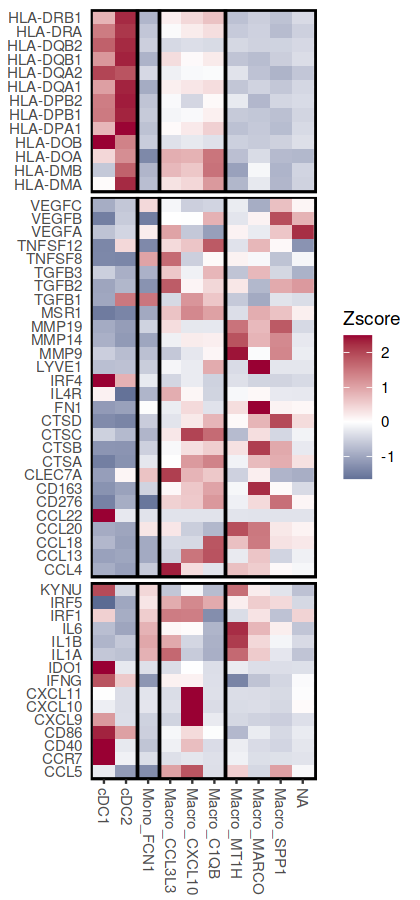

In [78]:
options(repr.plot.height = 7.5, repr.plot.width = 3.5)
p1 <- ggplot(subset(Mmarker_data,geneClass=='MHC II gene'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white",midpoint = 0)+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(-0.5,2.5,3.5,6.5),size=.8)
p2 <- ggplot(subset(Mmarker_data,geneClass=='M2'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white",midpoint = 0)+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),,axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(-0.5,2.5,3.5,6.5),size=.8)
p3 <- ggplot(subset(Mmarker_data,geneClass=='M1'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white",midpoint = 0)+
theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),legend.position="none",axis.ticks.y = element_blank())+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
  geom_vline(xintercept=c(-0.5,2.5,3.5,6.5),size=.8)

p4<- p1 %>% 
 #insert_top(group, height = .1) %>%
    insert_bottom(p2,height = 27/13) %>%
   insert_bottom(p3,height = 14/13) 
p4

In [79]:
pdf(file = './output/bulk/section_3/0.TAMcell_selectGeneHeatmap.pdf',width = 3.5,height = 7.5)
print(p4)
dev.off()

png 
  2

## 3.Visualization of B cell 

In [107]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 33)

In [144]:
mergeData_B$cellType <- factor(mergeData_B$cellType,
                                    levels = c('B cell','Plasma cell','pDC'),
                                    labels = c('B cell','Plasma cell','pDC'))

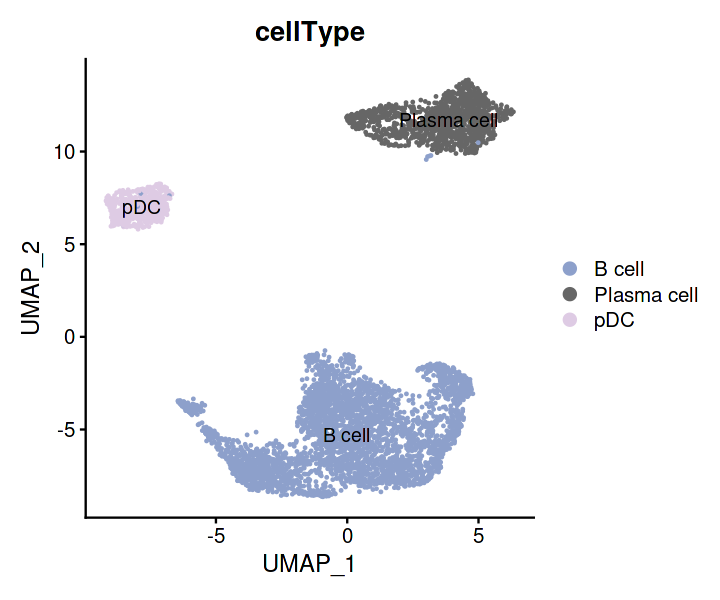

In [151]:
options(repr.plot.height = 5, repr.plot.width = 6)
dimP3 <- DimPlot(object = mergeData_B,reduction = 'umap',group.by = c('cellType'),cols = cellType_col[31:33], label = T)
dimP3

In [152]:
pdf(file = './output/bulk/section_3/0.Bcell_DimPlot.pdf',width = 6,height = 5)
print(dimP3)
dev.off()

png 
  2

In [110]:
expr <- t(as.matrix(mergeData_B@assays$RNA@data))
expr <- as.data.frame(expr)
expr$label <- mergeData_B$cellType

In [111]:
etest_gene <- SelectGene(expr = expr,k = 50)

Warning message:
“All elements of `...` must be named.
Did you want `data = -label`?”
Warning message:
“Use of `sub_expr$gene` is discouraged. Use `gene` instead.”
Warning message:
“Use of `sub_expr$cell_type` is discouraged. Use `cell_type` instead.”


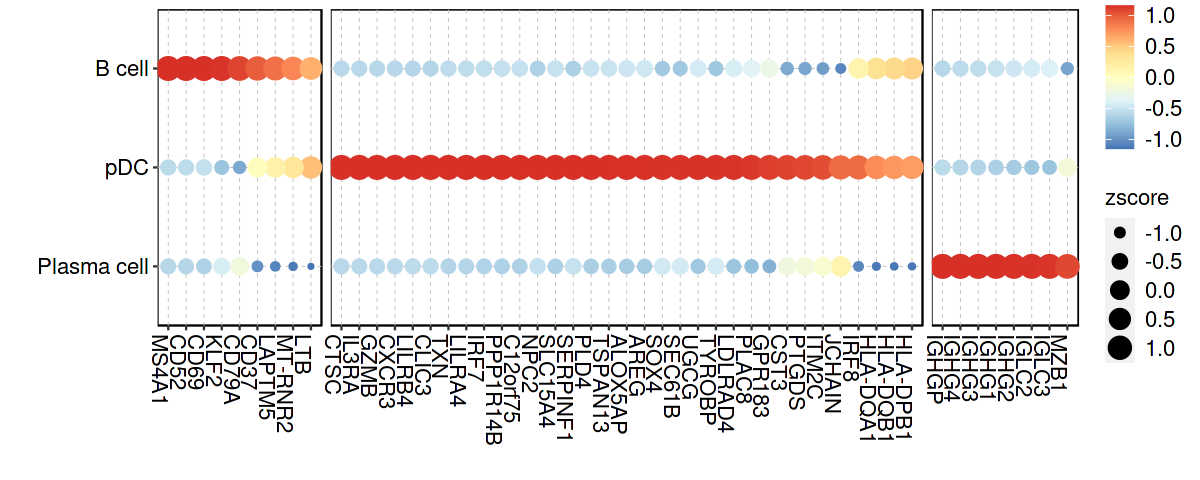

In [112]:
options(repr.plot.height = 4, repr.plot.width = 10)
M_heatmap3 <- Marker_heatmap(expr, etest_gene)
M_heatmap3

In [113]:
pdf(file = './output/bulk/section_3/0.Bcell_Marker_heatmap.pdf',width = 10,height = 5)
print(M_heatmap3)
dev.off()

Warning message:
“Use of `sub_expr$gene` is discouraged. Use `gene` instead.”
Warning message:
“Use of `sub_expr$cell_type` is discouraged. Use `cell_type` instead.”


png 
  2

In [80]:
MHC_II2<- c('HLA-DMA','HLA-DMB','HLA-DPA1','HLA-DPB1','HLA-DQA1','HLA-DRA','HLA-DRB1')
memory <- c('CXCR3','CXCR4','CD27','IRF4','IRF7','IRF8')
naive <- c('MS4A1','CD69','CD79A','CD19','CD22','CD83')
Switched <- c('IGHE','IGHM','IGHD','IGHG1','IGHG2','IGHG3','IGHG4','IGHGP','IGHA1','IGHA2','JCHAIN')

In [86]:
DotPlot_data_B <- DotPlot(object = mergeData_B,
        features = c(naive,Switched,memory,MHC_II2),cols = c('blue','red'),group.by = 'cellType')

Warning message:
“Scaling data with a low number of groups may produce misleading results”


In [87]:
Bmarker_data  <- DotPlot_data_B$data
Bmarker_data$Zscore <- Bmarker_data$avg.exp.scaled
Bmarker_data$cluster <- factor(x = Bmarker_data$id,
                               levels = c('B cell','pDC','Plasma cell'),
                                labels = c('B cell','pDC','Plasma cell') 
                              )

In [88]:
Bmarker_data$geneClass <- NA
Bmarker_data$geneClass <- ifelse(Bmarker_data$features.plot %in% naive,'naive',Bmarker_data$geneClass)
Bmarker_data$geneClass <- ifelse(Bmarker_data$features.plot %in% memory,'memory',Bmarker_data$geneClass)
Bmarker_data$geneClass <- ifelse(Bmarker_data$features.plot %in% Switched,'Switched',Bmarker_data$geneClass)
Bmarker_data$geneClass <- ifelse(Bmarker_data$features.plot %in% MHC_II2,'MHC II gene',Bmarker_data$geneClass)

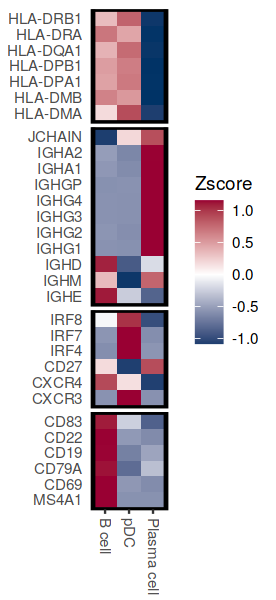

In [89]:
options(repr.plot.height = 5, repr.plot.width = 2.3)
p1 <- ggplot(subset(Bmarker_data,geneClass=='MHC II gene'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white",midpoint = 0)+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,3.5),size=.8)
p2 <- ggplot(subset(Bmarker_data,geneClass=='Switched'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white",midpoint = 0)+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,3.5),size=.8)
p3 <- ggplot(subset(Bmarker_data,geneClass=='memory'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white",midpoint = 0)+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,3.5),size=.8)
p4 <- ggplot(subset(Bmarker_data,geneClass=='naive'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white",midpoint = 0)+
theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),legend.position="none",axis.ticks.y = element_blank())+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
  geom_vline(xintercept=c(0.5,3.5),size=.8)

p5<- p1 %>%
    insert_bottom(p2,height = length(Switched)/length(MHC_II2)) %>%
    insert_bottom(p3,height = length(memory)/length(MHC_II2)) %>%
   insert_bottom(p4,height = length(naive)/length(MHC_II2)) 
p5

In [90]:
pdf(file = './output/bulk/section_3/0.Bcell_selectGeneHeatmap.pdf',width = 2.3,height = 5)
print(p5)
dev.off()

png 
  2

## 4.Visualization of Stromal cells

In [147]:
mergeData_CAF_m <- readRDS(file='./output/1.sangleCell_pre/OV_mergeData_CAF.RDS')


 CAF1  CAF2  CAF3  CAF4  CAF5  Endo myCAF 
 9463  1736  3966  3892  1779  3328  2241 

In [ ]:
mergeData_CAF_m <- subset(mergeData_CAF_m,cellType %in% c('CAF1','CAF2','CAF3','CAF4','CAF5','Endo','myCAF'))

In [148]:
mergeData_CAF_m$cellType <- factor(mergeData_CAF_m$cellType,
                                    levels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo'),
                                    labels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo'))

In [157]:
mergeData_CAF_m <- RunUMAP(mergeData_CAF_m,reduction = "pca",dims = 1:50,seed.use = 12345)
mergeData_CAF_m <- FindNeighbors(mergeData_CAF_m,reduction = 'pca', dims = 1:50, verbose = FALSE)
mergeData_CAF_m <- RunTSNE(mergeData_CAF_m,reduction = 'pca',dims = 1:50,seed.use = 12345)
mergeData_CAF_m <- FindClusters(mergeData_CAF_m,resolution = 1, verbose = FALSE,random.seed=20210707)

18:42:59 UMAP embedding parameters a = 0.9922 b = 1.112

18:42:59 Read 26405 rows and found 50 numeric columns

18:42:59 Using Annoy for neighbor search, n_neighbors = 30

18:42:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:43:04 Writing NN index file to temp file /home/data/t060324/Rtmp/RtmpsUiPlc/file1e8ec010cf0990

18:43:04 Searching Annoy index using 1 thread, search_k = 3000

18:43:14 Annoy recall = 100%

18:43:16 Commencing smooth kNN distance calibration using 1 thread

18:43:18 Initializing from normalized Laplacian + noise

18:43:19 Commencing optimization for 200 epochs, with 1227654 positive edges

18:43:32 Optimization finished



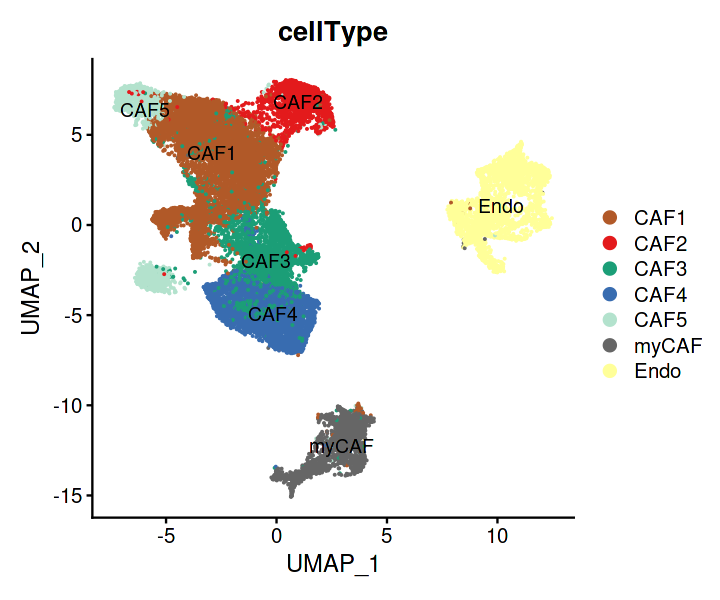

In [186]:
options(repr.plot.height = 5, repr.plot.width = 6)
dimPCAF <- DimPlot(object = mergeData_CAF_m,reduction = 'umap',group.by = c('cellType'),cols = cellType_col[1:7], label = T)
dimPCAF

In [187]:
pdf(file = './output/bulk/section_3/0.CAFcell_DimPlot.pdf',width = 6,height = 5)
print(dimPCAF)
dev.off()

png 
  2

In [7]:
expr <- t(as.matrix(mergeData_CAF_m@assays$RNA@data))
expr <- as.data.frame(expr)
expr$label <- mergeData_CAF_m$cellType

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 9.4 GiB”


In [8]:
etest_gene <- SelectGene(expr = expr,k = 100)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.
ℹ The deprecated feature was likely used in the scibet package.
  Please report the issue to the authors.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
ℹ The deprecated feature was likely used in the scibet package.
  Please report the issue to the authors.”
Warning message:
“Use of `sub_expr$gene` is discouraged.
ℹ Use `gene` instead.”
Warning message:
“Use of `sub_expr$cell_type` is discouraged.
ℹ Use `cell_type` instead.”


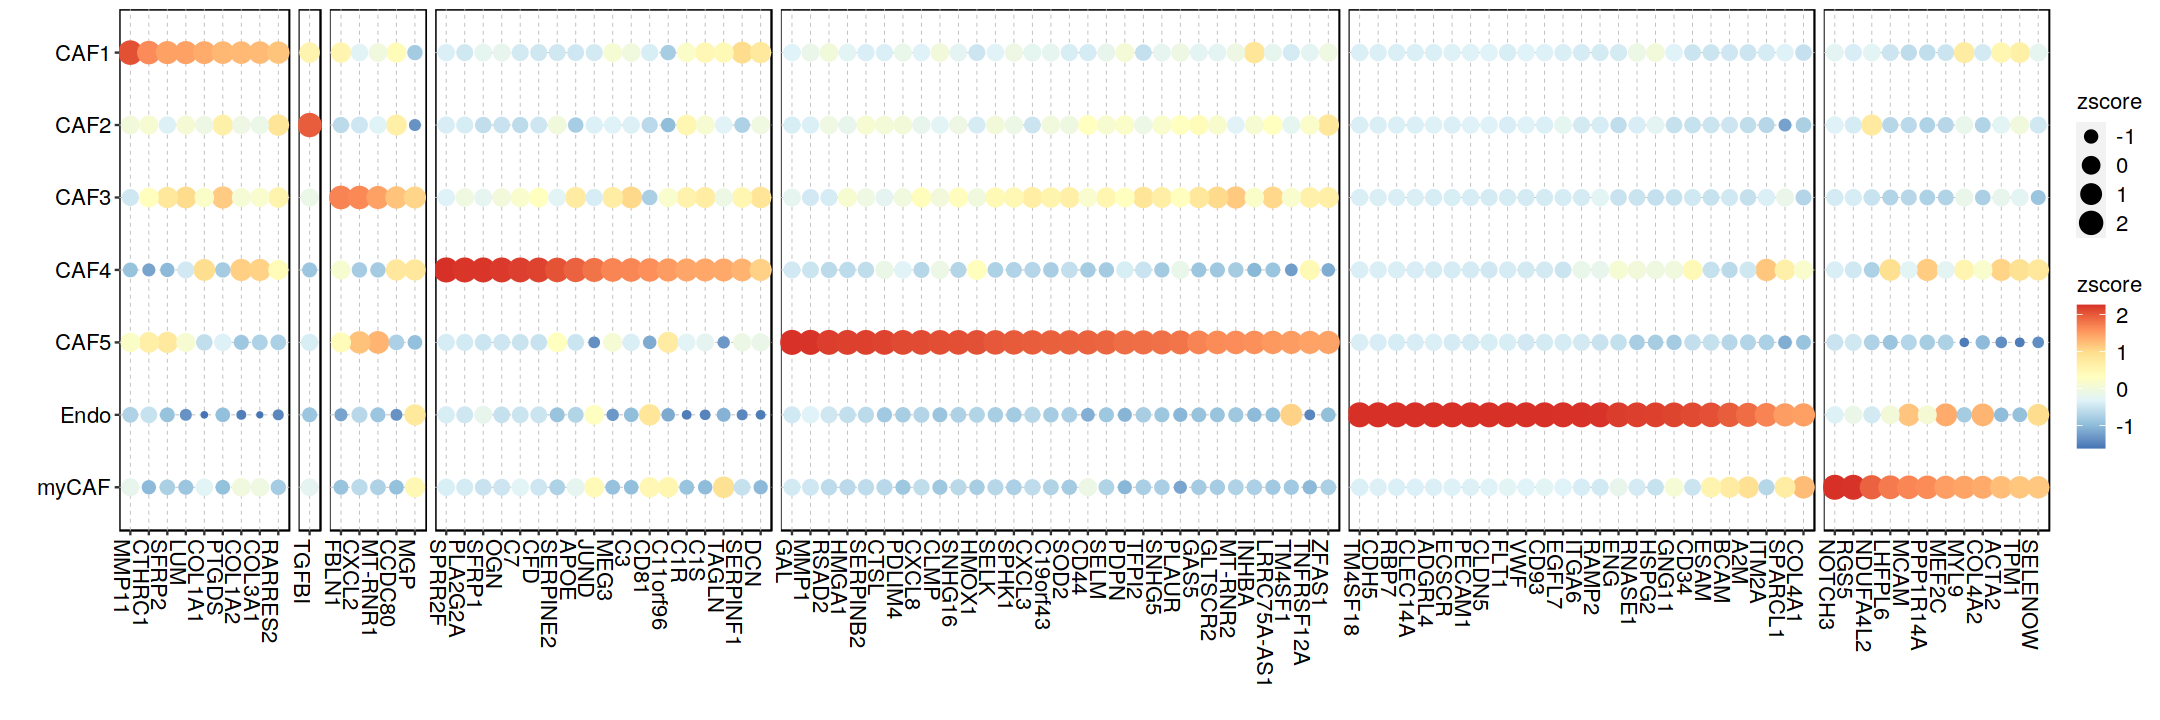

In [12]:
options(repr.plot.height = 6, repr.plot.width = 18)
M_heatmap4 <- Marker_heatmap(expr, etest_gene)
M_heatmap4

In [13]:
pdf(file = './output/bulk/section_3/0.CAFcell_Marker_heatmap.pdf',width = 20,height = 5)
print(M_heatmap4)
dev.off()

Warning message:
“Use of `sub_expr$gene` is discouraged.
ℹ Use `gene` instead.”
Warning message:
“Use of `sub_expr$cell_type` is discouraged.
ℹ Use `cell_type` instead.”


png 
  2

In [92]:
Collagens <- c('COL1A1','COL1A2','COL3A1','COL4A1','COL5A1','COL5A2','COL6A1','COL7A1','COL10A1','COL11A1','COL12A1')
ECM <- c('BGN','DCN','LUM','TAGLN','ELN','FN1','FAP','POSTN')
MMPs <- c('MMP1','MMP2','MMP3','MMP9','MMP10','MMP11','MMP14','MMP19')
TGFb<-c('SERPINE1','CTHRC1','THBS2','THBS1','SULF1')
angiogenesis <- c('EGFL6','PDGFC','VEGFA','LOX','TGFBI','ANGPTL4','CA9')
Contractile <- c('PDGFA','ACTA2','MYL6','MYH9','MYH11','MCAM','PLN')
RAS <- c('RASL12','RASGRP2')
proinflammatory <- c('CFD','CFI','C3','C7','CCL21','CXCL14','CXCL12','IL33','IL6','IL7','CXCL3','CXCL2','CCL2')
endo <- c('PECAM1', 'VWF','CDH5')

In [93]:
DotPlot_data_CAF <- DotPlot(object = mergeData_CAF_m,assay = 'RNA',
        features = c(Collagens,ECM,MMPs,TGFb,angiogenesis,Contractile,RAS,endo,proinflammatory),cols = c('blue','red'),group.by = 'cellType')

In [94]:
CAFmarker_data  <- DotPlot_data_CAF$data
CAFmarker_data$Zscore <- CAFmarker_data$avg.exp.scaled
CAFmarker_data$cluster <-  CAFmarker_data$id
                              

In [95]:
CAFmarker_data$geneClass <- NA
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% Collagens,'Collagens',CAFmarker_data$geneClass)
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% ECM,'ECM',CAFmarker_data$geneClass)
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% MMPs,'MMPs',CAFmarker_data$geneClass)
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% TGFb,'TGFb',CAFmarker_data$geneClass)
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% angiogenesis,'angiogenesis',CAFmarker_data$geneClass)
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% Contractile,'Contractile',CAFmarker_data$geneClass)
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% RAS,'RAS',CAFmarker_data$geneClass)
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% endo,'endo',CAFmarker_data$geneClass)
CAFmarker_data$geneClass <- ifelse(CAFmarker_data$features.plot %in% proinflammatory,'proinflammatory',CAFmarker_data$geneClass)

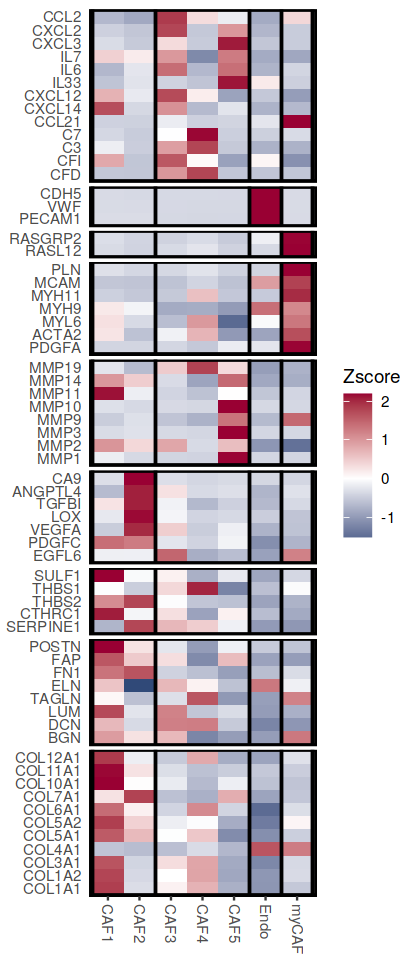

In [96]:
options(repr.plot.height =8, repr.plot.width = 3.5)
p1 <- ggplot(subset(CAFmarker_data,geneClass=='proinflammatory'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)
p2 <- ggplot(subset(CAFmarker_data,geneClass=='endo'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)
p3 <- ggplot(subset(CAFmarker_data,geneClass=='RAS'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)
p4 <- ggplot(subset(CAFmarker_data,geneClass=='Contractile'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)
p5 <- ggplot(subset(CAFmarker_data,geneClass=='angiogenesis'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)
p6 <- ggplot(subset(CAFmarker_data,geneClass=='TGFb'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)
p7 <- ggplot(subset(CAFmarker_data,geneClass=='MMPs'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)
p8 <- ggplot(subset(CAFmarker_data,geneClass=='ECM'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
xlab(NULL) + ylab(NULL)+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),legend.position="none",axis.ticks = element_blank(),axis.text.x = element_blank())+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)
p9 <- ggplot(subset(CAFmarker_data,geneClass=='Collagens'), aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),axis.ticks.y = element_blank())+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
  geom_vline(xintercept=c(0.5,2.5,5.5,6.5,7.5),size=.8)

p10<- p1 %>% 
insert_bottom(p2,height = length(endo)/length(proinflammatory)) %>%
insert_bottom(p3,height = length(RAS)/length(proinflammatory)) %>%
insert_bottom(p4,height = length(Contractile)/length(proinflammatory)) %>%
insert_bottom(p7,height = length(MMPs)/length(proinflammatory)) %>%
insert_bottom(p5,height = length(angiogenesis)/length(proinflammatory)) %>%
insert_bottom(p6,height = length(TGFb)/length(proinflammatory)) %>%
insert_bottom(p8,height = length(ECM)/length(proinflammatory)) %>%
insert_bottom(p9,height = length(Collagens)/length(proinflammatory))
p10

In [97]:
pdf(file = './output/bulk/section_3/0.CAFcell_selectGeneHeatmap.pdf',width = 3.5,height = 8)
print(p10)
dev.off()

png 
  2

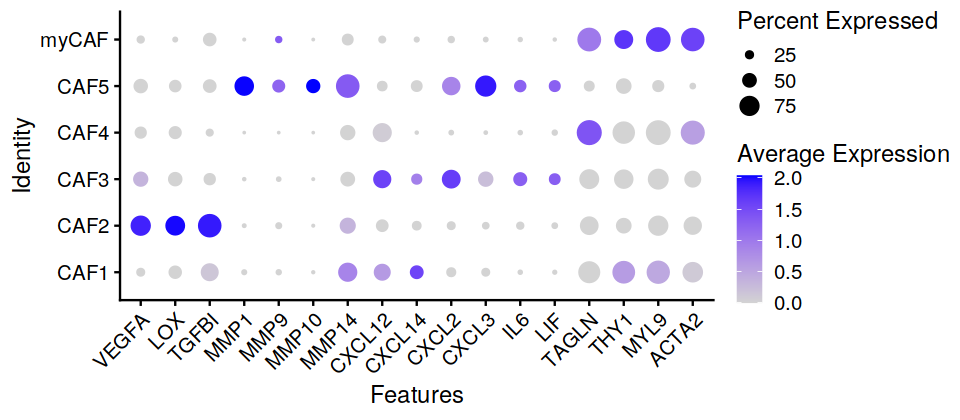

In [14]:
options(repr.plot.height = 3.5, repr.plot.width = 8)
dotplot <- DotPlot(subset(mergeData_CAF_m,cellType %in% c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF')),group.by = 'cellType', features = c('VEGFA','LOX','TGFBI','MMP1','MMP9','MMP10','MMP14','CXCL12','CXCL14','CXCL2','CXCL3','IL6','LIF','TAGLN','THY1','MYL9','ACTA2'),assay = 'RNA',cluster.idents = F,col.min = 0) + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
dotplot

In [15]:
pdf(file = './output/bulk/section_5/0.CAF3_inflammatoryMarker_dotpot.pdf',width = 8,height = 4)
print(dotplot)
dev.off()

png 
  2

## 5.Cell merger and cell atlas construction

In [114]:
mergeData_immune <- merge(x = mergeData_B,y = list(mergeData_T,mergeData_TAM,mergeData_CAF_m))

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [115]:
DefaultAssay(mergeData_immune) <- 'RNA'
mergeData_immune <- NormalizeData(mergeData_immune, normalization.method = "LogNormalize")
mergeData_immune <- FindVariableFeatures(mergeData_immune, selection.method = "vst", nfeatures = 3000)
mergeData_immune <- ScaleData(mergeData_immune,vars.to.regress = c('nCount_RNA','mitoRatio'))
mergeData_immune <- RunPCA(mergeData_immune)


Regressing out nCount_RNA, mitoRatio

Centering and scaling data matrix

PC_ 1 
Positive:  CD74, HLA-DQB1, HLA-DPA1, TYROBP, HLA-DRB1, CTSS, HLA-DQA1, HLA-DRA, HLA-DPB1, FCER1G 
	   CYBB, AIF1, FCGR3A, C1QC, FCGR2A, SPI1, MS4A7, HLA-DMA, CD14, LST1 
	   MS4A6A, PLEK, RGS1, LYZ, CD68, HLA-DMB, CSF1R, CD163, MSR1, HLA-DRB5 
Negative:  SPARC, IGFBP7, CALD1, COL6A2, COL1A2, DCN, COL1A1, COL3A1, COL6A1, COL6A3 
	   C1R, C1S, AEBP1, TPM2, RARRES2, IGFBP4, THY1, FSTL1, SPARCL1, TAGLN 
	   CCDC80, MYL9, PCOLCE, COL5A2, LUM, SERPINH1, COL5A1, NNMT, BGN, IGFBP2 
PC_ 2 
Positive:  CST3, IER3, PLAUR, FTL, SERPINF1, TMEM176B, SERPING1, DCN, SOD2, FTH1 
	   C3, PSAP, BASP1, APOE, MAFB, C1S, CTSB, GPNMB, CTSL, C1R 
	   PDPN, TGFBI, TMEM176A, LUM, TIMP1, PLTP, FBLN1, CXCL8, COL1A1, TNFRSF12A 
Negative:  CDH5, ADGRL4, TM4SF18, VWF, CLEC14A, EMCN, SOX18, NOSTRIN, ROBO4, MMRN2 
	   CXorf36, PTPRB, ESAM, CALCRL, CYYR1, MYCT1, EGFL7, SHANK3, ECSCR, PCDH17 
	   KDR, ADGRF5, CD34, FLT1, TIE1, RBP7, AFAP1L1, 

In [8]:
mergeData_immune <- RunHarmony(object = mergeData_immune,group.by.vars = c('dataset'))

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [9]:
mergeData_immune <- RunUMAP(mergeData_immune,reduction = "harmony",dims = 1:50,seed.use = 12345)
mergeData_immune <- FindNeighbors(mergeData_immune,reduction = 'harmony', dims = 1:50, verbose = FALSE)
mergeData_immune <- RunTSNE(mergeData_immune,reduction = 'harmony',dims = 1:50,seed.use = 12345)
mergeData_immune <- FindClusters(mergeData_immune,resolution = 1, verbose = FALSE,random.seed=20210707)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:47:12 UMAP embedding parameters a = 0.9922 b = 1.112

14:47:12 Read 110917 rows and found 50 numeric columns

14:47:12 Using Annoy for neighbor search, n_neighbors = 30

14:47:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:47:30 Writing NN index file to temp file /home/data/t060324/Rtmp/RtmpsUiPlc/file1e8ec01bad6fd9

14:47:30 Searching Annoy index using 1 thread, search_k = 3000

14:48:22 Annoy recall = 100%

14:48:23 Commencing smooth kNN distance calibration using 1 thread

14

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



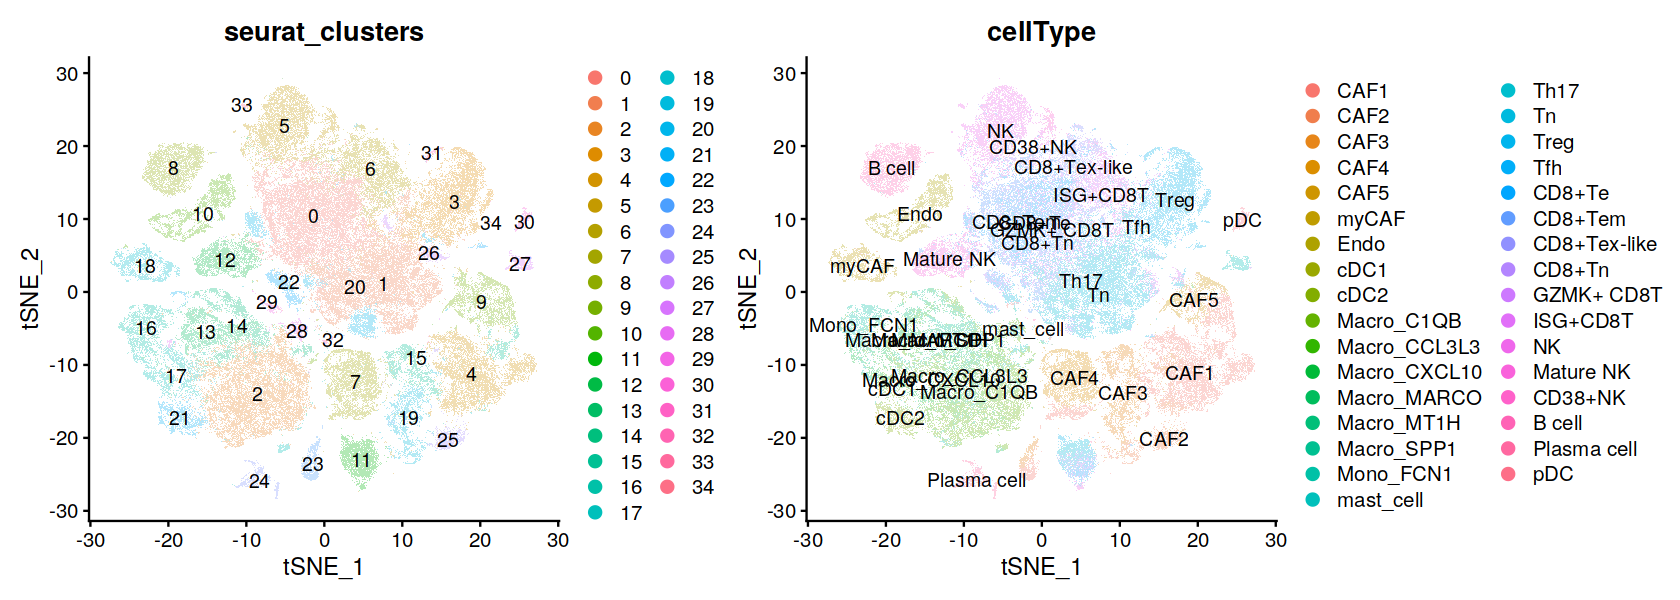

In [34]:
options(repr.plot.height = 5, repr.plot.width = 14)
DimPlot(object = mergeData_immune,reduction = 'tsne',group.by = c('seurat_clusters','cellType'),pt.size = 0.3, label = TRUE)

In [106]:
genes_to_check = c('PTPRC', 'CD3D', 'CD3E','BTLA', 'CD4','CD8A','CXCR6','CD27','CD69','ITGAE','CXCL13','LAG3','GZMA',
                   'GZMK', 'CD79A', 'MS4A1' ,'PDCD1','TIGIT','CTLA4','IL2RA','FOXP3','IL7R','CCR7',
                   'IGHG1', 'MZB1', 'SDC1',
                   'CD68', 'CD163', 'CD14', 'JCHAIN','TCF4','IRF4',
                   'TPSAB1' , 'TPSB2',  # mast cells,
                   'RCVRN','FPR1' , 'VIM' ,
                   'C1QA',  'C1QB',  # mac
                   'S100A9', 'S100A8','SPP1', 'MMP1','ATF4','IL6','THBS2','CYR61','CXCL12',# monocyte
                   'LAMP3', 'IDO1','IDO2',## DC3 
                   'CD1E','CD1C', # DC2
                   'KRT86','GNLY', # NK 
                   'FGF7','MME', 'ACTA2','MYH11','TAGLN', ## fibo 
                   'DCN', 'LUM',  'GSN' , ## mouse PDAC fibo 
                   'FAP','FN1','THY1','COL1A1','COL3A1', 
                   'PECAM1', 'VWF',  ## endo 
                   'EPCAM' , 'KRT19', 'KRT18', 'CD24','MKI67' )
                   

In [132]:
table(mergeData_immune$seurat_clusters,mergeData_immune$cellType)

    
     B cell CAF1 CAF2 CAF3 CAF4 CAF5 CD38+NK CD8+Te CD8+Tem CD8+Tex CD8+Tn
  0       2    0    1    0    0    0     247   6739    2738     887    776
  1       3    2    5    0    0    1      57    339     503      14    473
  2       0    0    0    0    0    0       0      1       0       0      0
  3       0 6723  588 1995  240  121       0      1       6       1      0
  4       0    1    0    0    0    0       0      1       2       0      0
  5       0    0    0    0    2    0       0      3      22      49      2
  6       0    0    0    0    0    0     569    124     234      73    207
  7       0    2    1    0    0    0      62    168      75    1268     36
  8       5   32   32    4    0   18      18    452     337     133    180
  9       0  570    1   35 3038    5       0      0       0       1      0
  10   3372    1    0    0    0    0       0      0       6       0      0
  11      0    9    0    3    0    2       0     13       8       3      0
  12      0    0    

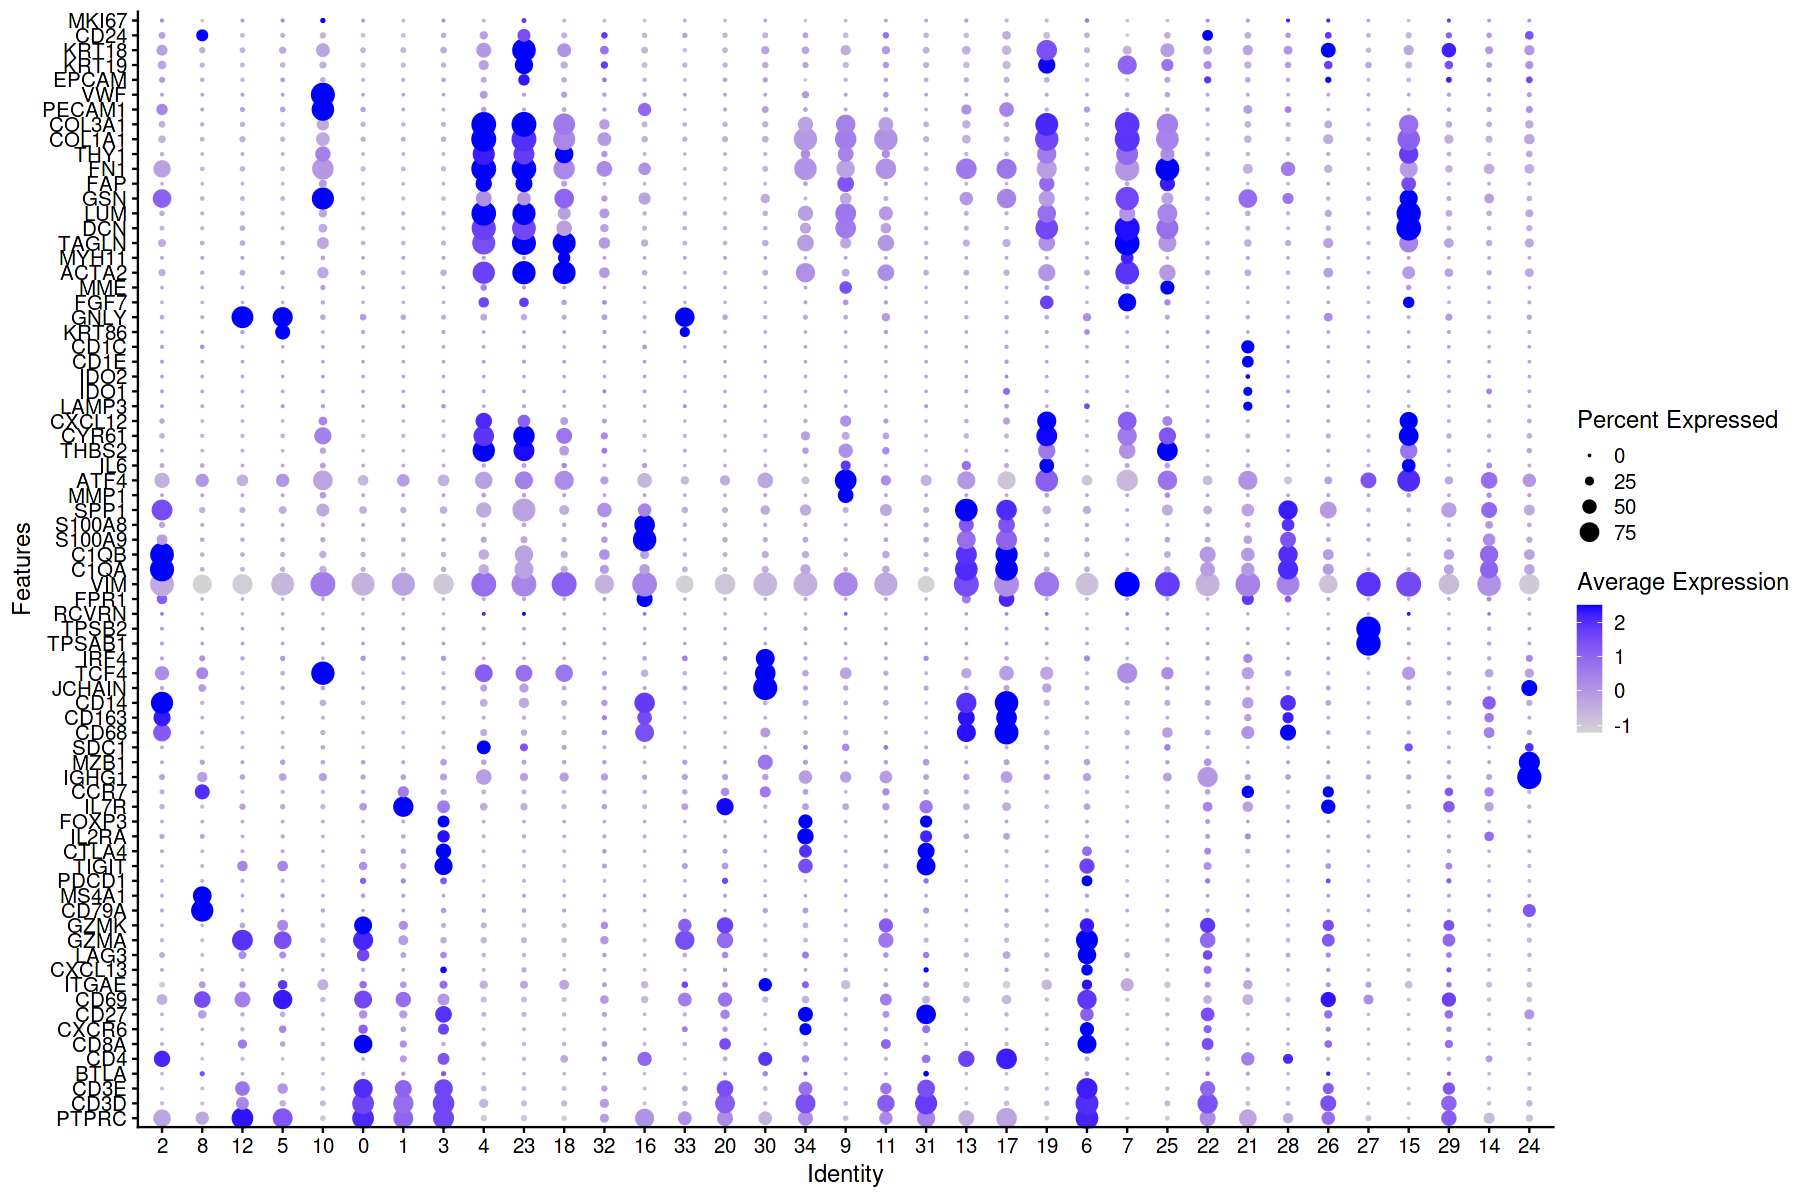

In [107]:
options(repr.plot.height = 10, repr.plot.width = 15)
DotPlot(mergeData_immune,group.by = 'seurat_clusters', features = unique(genes_to_check),assay = 'RNA',cluster.idents = T) + coord_flip()

In [318]:
#mergeData_immune <- subset(mergeData_immune,seurat_clusters %in% c(0:13,15:21,22:24,26:30))

In [35]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 33)

In [36]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col2 <- sample(col_vector, 6)

In [8]:
mergeData_immune

An object of class Seurat 
49605 features across 110917 samples within 2 assays 
Active assay: RNA (47605 features, 3000 variable features)
 1 other assay present: integrated
 4 dimensional reductions calculated: pca, harmony, umap, tsne

In [30]:
table(mergeData_immune$cellType)


        CAF1         CAF2         CAF3         CAF4         CAF5        myCAF 
        9463         1736         3966         3892         1779         2241 
        Endo         cDC1         cDC2   Macro_C1QB Macro_CCL3L3 Macro_CXCL10 
        3328          595         1379         7421         3390         1770 
 Macro_MARCO   Macro_MT1H   Macro_SPP1    Mono_FCN1    mast_cell         Th17 
        1386         1293         2962         2120         1914         4976 
          Tn         Treg          Tfh       CD8+Te      CD8+Tem CD8+Tex-like 
        8921         6080         1270         8038         4177         2463 
      CD8+Tn   GZMK+ CD8T     ISG+CD8T           NK    Mature NK      CD38+NK 
        1724         3128         4401         5776         3042         1010 
      B cell  Plasma cell          pDC 
        3515         1227          534 

In [29]:
mergeData_immune$cellType <- factor(mergeData_immune$cellType,
                                    levels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo',
                                               'cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell',
                                              'Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK','B cell','Plasma cell','pDC'),
                                    labels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo',
                                               'cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell',
                                              'Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK','B cell','Plasma cell','pDC'))

In [31]:
mergeData_immune$cellType_rough <- mergeData_immune$cellType
mergeData_immune$cellType_rough <- ifelse(mergeData_immune$cellType %in% c('Th17','Tn','Treg','Tfh'),'CD4+ T',mergeData_immune$cellType_rough)
mergeData_immune$cellType_rough <- ifelse(mergeData_immune$cellType %in% c('CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T'),'CD8+ T',mergeData_immune$cellType_rough)
mergeData_immune$cellType_rough <- ifelse(mergeData_immune$cellType %in% c('NK','Mature NK','CD38+NK'),'NK',mergeData_immune$cellType_rough)

mergeData_immune$cellType_rough <- ifelse(mergeData_immune$cellType %in% c('Macro_C1QB','Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_SPP1','Mono_FCN1','Macro_MT1H','mast_cell','cDC1','cDC2'),'myeloid',mergeData_immune$cellType_rough)
mergeData_immune$cellType_rough <- ifelse(mergeData_immune$cellType %in% c('Plasma cell','B cell','pDC'),'B',mergeData_immune$cellType_rough)
mergeData_immune$cellType_rough <- ifelse(mergeData_immune$cellType %in% c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo'),'stroma cell',mergeData_immune$cellType_rough)



In [32]:
table(mergeData_immune$cellType_rough)


          B      CD4+ T      CD8+ T     myeloid          NK stroma cell 
       5276       21247       23931       24230        9828       26405 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



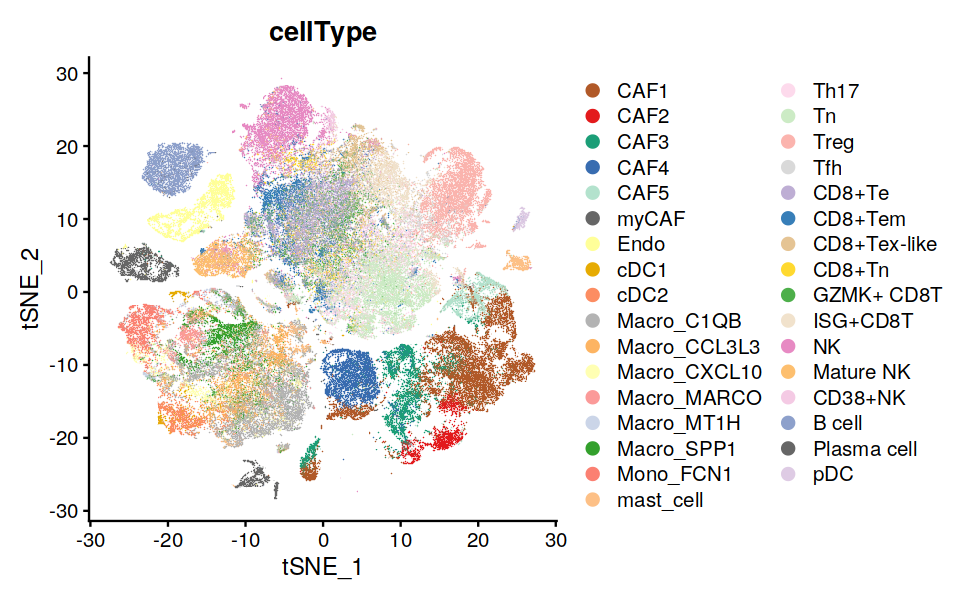

In [37]:
options(repr.plot.height = 5, repr.plot.width =8)
dimP5 <- DimPlot(object = subset(mergeData_immune,seurat_clusters !='11'),reduction = 'tsne',group.by = c('cellType'),cols = cellType_col,pt.size = 1.2, label = F)
dimP5

In [38]:
pdf(file = './output/bulk/section_3/0.AllImmunecell_DimPlot.pdf',width = 8,height = 5)
print(dimP5)
dev.off()

png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



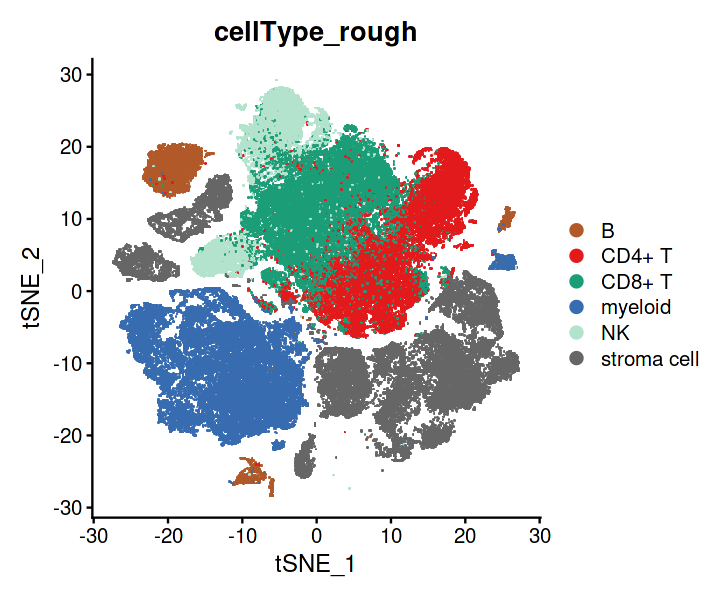

In [112]:
options(repr.plot.height = 5, repr.plot.width =6)
dimP4 <- DimPlot(object = subset(mergeData_immune,seurat_clusters !='11'),reduction = 'tsne',group.by = c('cellType_rough'),cols = cellType_col2,pt.size = 1, label = F)
dimP4

In [113]:
pdf(file = './output/bulk/section_3/0.AllImmunecell_DimPlot2.pdf',width = 6,height = 5)
print(dimP4)
dev.off()

png 
  2

In [27]:
saveRDS(mergeData_immune,file = './output/1.sangleCell_pre/OV_mergeData_immune_final.RDS')

In [ ]:
Idents(mergeData_immune) <- 'cellType'
cellMarkers <- FindAllMarkers(mergeData_immune,test.use = 'bimod',only.pos = T,logfc.threshold = 0.5)

In [ ]:
cellMarkers$cluster <- factor(cellMarkers$cluster,
                             
                                    levels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo',
                                               'cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell',
                                              'Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK','B cell','Plasma cell','pDC'),
                                    labels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo',
                                               'cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell',
                                              'Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK','B cell','Plasma cell','pDC')
                             )

In [ ]:
cellMarkers <- cellMarkers[order(cellMarkers$cluster),]
cellMarkers <- subset(cellMarkers,!grepl(pattern = '^RP[LS]',gene))


In [44]:
top5 <- cellMarkers %>% group_by(cluster) %>% top_n(n = 5, wt = avg_log2FC)

In [45]:
cellMap_list <- split(mergeData_immune$cellType,mergeData_immune$cellType_rough)

In [46]:
dotplotData <- DotPlot(object = mergeData_immune,assay = 'RNA',
        features = unique(top5$gene),cols = c('blue','red'),group.by = 'cellType')

In [47]:
marker_data  <- dotplotData$data
marker_data$EXP <- marker_data$avg.exp.scaled
marker_data$cluster <-  marker_data$id
marker_data$cluster <- factor(x = marker_data$cluster,          
                                    levels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo',
                                               'cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell',
                                              'Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK','B cell','Plasma cell','pDC'),
                                    labels = c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo',
                                               'cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell',
                                              'Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK','B cell','Plasma cell','pDC') 
                              )

In [48]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col2 <- sample(col_vector,6)

In [49]:
group <- c('CAF1','CAF2','CAF3','CAF4','CAF5','myCAF','Endo',
                                               'cDC1','cDC2','Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1','mast_cell',
                                              'Th17','Tn','Treg','Tfh','CD8+Te','CD8+Tem','CD8+Tex-like','CD8+Tn','GZMK+ CD8T','ISG+CD8T','NK','Mature NK','CD38+NK','B cell','Plasma cell','pDC') %>% as.data.frame() %>% 
  mutate(group=c(rep("stroma cell",7),rep("myeloid cell",10),rep("CD4+ T cell",4),rep("CD8+ T cell",6),rep("NK",3),rep("B cell",3))) %>%
  mutate(p="Cell group") %>%
  ggplot(aes(.,y=p,fill=group))+scale_fill_manual("group", values =  cellType_col2)+
  geom_tile() + 
  scale_y_discrete(position="right") +
  theme_minimal()+xlab(NULL) + ylab(NULL) +
  theme(axis.text.x = element_blank())+
  labs(fill = "Cell group")

In [50]:
library(aplot)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


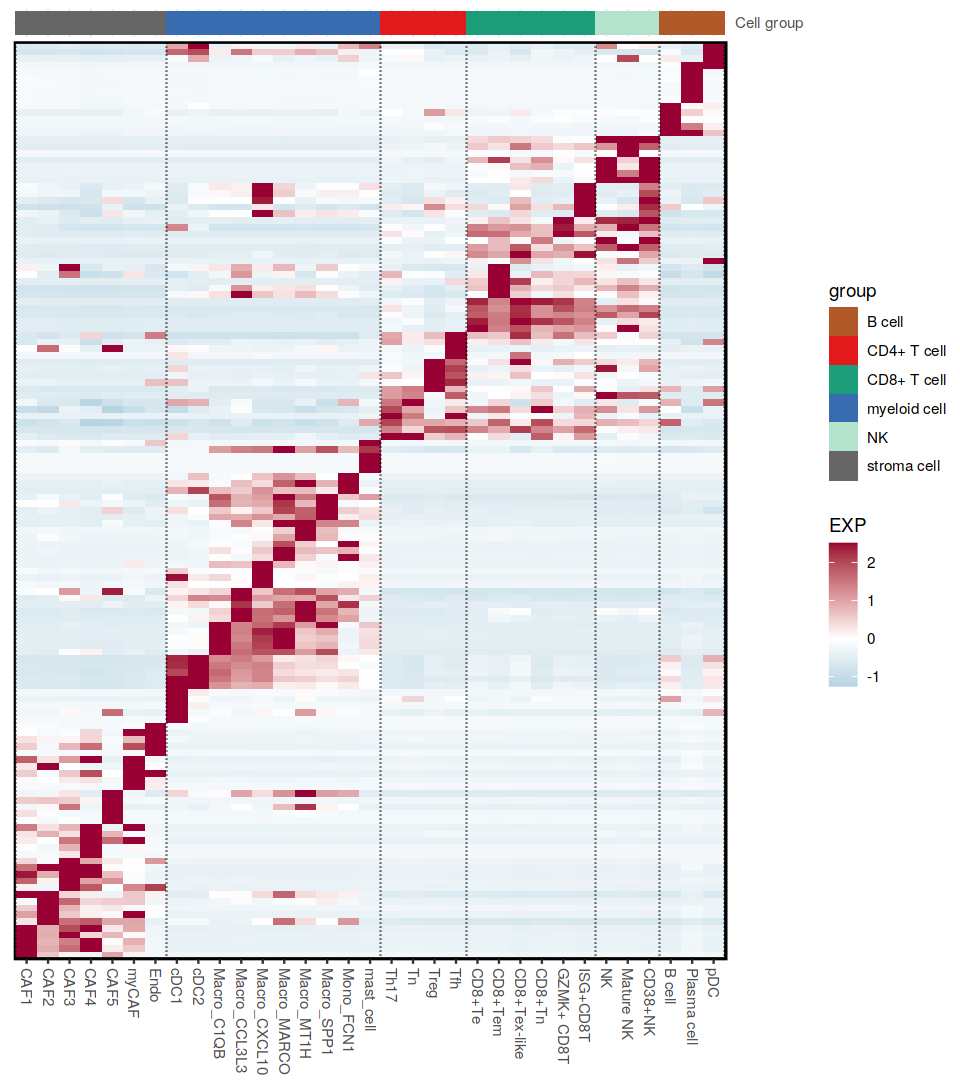

In [52]:
options(repr.plot.height = 9, repr.plot.width = 8)
p2 <- ggplot(marker_data, aes(y=features.plot, x=cluster, fill=EXP))+ 
geom_raster()+scale_fill_gradient2(low="#68AAC4", high="#990033", mid="white")+
theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),axis.ticks.y = element_blank(),axis.text.y = element_blank())+xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
  geom_vline(xintercept=c(0.5,7.5,17.5,21.5,27.5,30.5,33.5),size=.5,linetype='dotted')
p3 <- p2 %>%
insert_top(group, height = .03) 
p3

In [53]:
pdf(file = './output/bulk/section_3/0.AllImmunecell_markerGeneHeatmap.pdf',width = 8,height = 9)
print(p3)
dev.off()

png 
  2

In [ ]:
saveRDS(cellMarkers,file = './output/1.sangleCell_pre/OV_mergeData_immune_cellMarkers.RDS')